# COVID - 19 Data Analysis

### Datasets used : COVID -19 daily cases dataset in all countries by Johns Hopkins University, Dataset with various life factors

In [1]:
#Importinng required libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset as a pandas dataframe 
corona_dataset_csv = pd.read_csv('covid19_Confirmed_dataset.csv')
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
#The no.of rows and columns in the dataset
corona_dataset_csv.shape

(266, 104)

In [4]:
#Removing irrelevant columns 
corona_dataset_csv.drop(['Lat','Long','Province/State'],axis=1,inplace=True)
corona_dataset_csv.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [5]:
#Grouping the dataset by Country/Region. In case the dataset has multiple rows for one country, this command will
#sum all the entries in row and return a single row for each country. 
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()
corona_dataset_csv.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


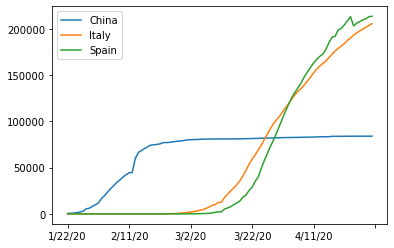

In [6]:
#Plotting days vs no.of cases for China, Italy and Spain. As clearly visible, cases in China have reached a steady state
#whereas cases in Italy and Spain have kept on increasing. 
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['Spain'].plot()
plt.legend()

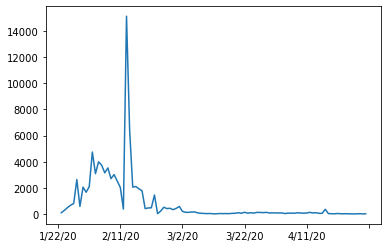

In [8]:
corona_dataset_aggregated.loc['China'].diff().plot()

In [29]:
#The diff() function calculates the difference between columns and further applying the max() function 
#will give the maximimum no.of infections increase in any given country. 
corona_dataset_aggregated.loc['China'].diff().max()

15136.0

In [12]:
#Applying the above commanand to the whole dataset, we will get the max infection rates of all countries
#Addind 'max infection rate' column to our dataset
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for country in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[country].diff().max())
corona_dataset_aggregated['max infection rate'] = max_infection_rates

In [13]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [14]:
#Now we can remove the daily infection columns and only keep country and max infection rate columns 
corona_data = pd.DataFrame(corona_dataset_aggregated['max infection rate'])
corona_data.head()

,max infection rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [15]:
#Importing the next dataset which contains various life factors such as life expectancy, corruption etc. 
world_happiness_report = pd.read_csv("worldwide_happiness_report.csv")
world_happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [16]:
#We want to establish a relation between happiness and COVID 19 cases, so we can remove irrelevant columns 
#and keep only the important ones - GDP,Social Support,Life expectancy and Freedom
columns_to_dropped = ['Overall rank','Score','Generosity','Perceptions of corruption']
world_happiness_report.drop(columns_to_dropped,axis=1 , inplace=True)

In [17]:
#Setting the index of the dataframe as the country name so that we can combine the two datasets.
world_happiness_report.set_index(['Country or region'],inplace=True)
world_happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [18]:
#Combing both datasets to obtain the final dataset
data = world_happiness_report.join(corona_data).copy()
data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0


In [19]:
#Correlation helps us observe the dependence of one variable on another. A high positive/negative correlation indicates
#a strong relationship between the two variables
data.corr()

#looking at the correlation coeff of max infection rate with all other factors, freedom to make choices has a lower coeff

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
GDP per capita,1.000000,0.754906,0.835462,0.379079,0.250118
Social support,0.754906,1.000000,0.719009,0.447333,0.191958
Healthy life expectancy,0.835462,0.719009,1.000000,0.390395,0.289263
Freedom to make life choices,0.379079,0.447333,0.390395,1.000000,0.078196
max infection rate,0.250118,0.191958,0.289263,0.078196,1.000000


### We can now visualise the results from the correlation plot to better judge the dependancy of various life factors on the COVID 19 infection rates. We take the log() of max infection rate to normalize and get a more even scale.

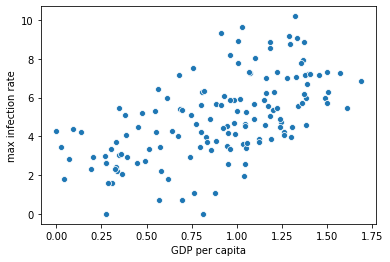

In [20]:
x = data['GDP per capita']
y = data['max infection rate']
sns.scatterplot(x,np.log(y))

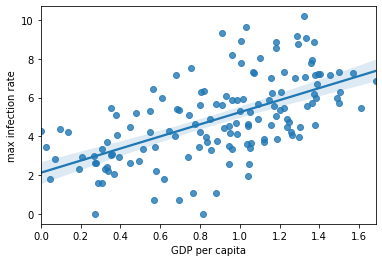

In [21]:
sns.regplot(x,np.log(y))

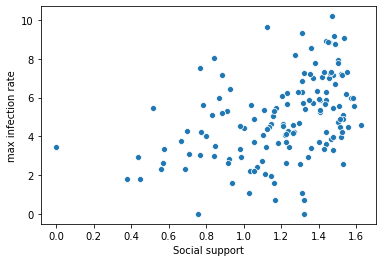

In [22]:
x = data['Social support']
y = data['max infection rate']
sns.scatterplot(x,np.log(y))

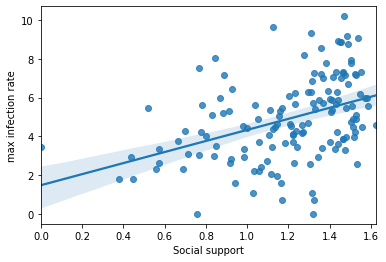

In [23]:
sns.regplot(x,np.log(y))

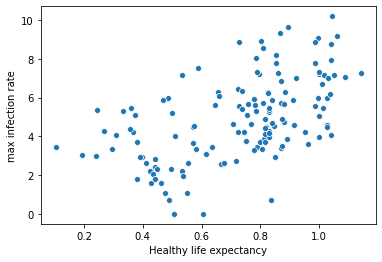

In [24]:
x = data['Healthy life expectancy']
y = data['max infection rate']
sns.scatterplot(x,np.log(y))

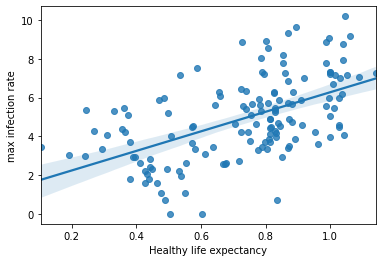

In [25]:
sns.regplot(x,np.log(y))

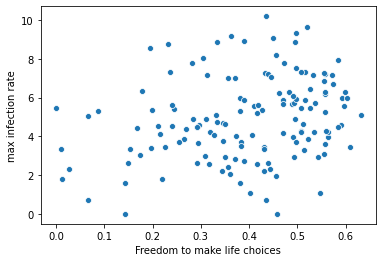

In [26]:
x = data['Freedom to make life choices']
y = data['max infection rate']
sns.scatterplot(x,np.log(y))

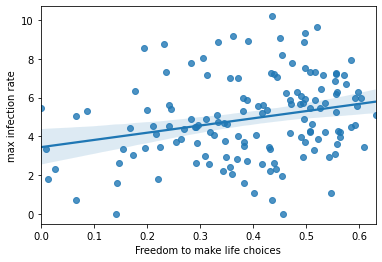

In [27]:
sns.regplot(x,np.log(y))

### From the abve plots, we cannot deny the relation between the happiness of people and the COVID-19 infection rates in different countries. However, the relationship is not a very strong. There may be other factors more affecting the infection rates but the purpose of the project was only to see the dependence of happiness on infection. 